In [ ]:
#Carregar as bibliotecas
import pandas as pd #Manipular em formato tabela
import numpy as np #Operacoes e arrays
import matplotlib.pyplot as plt #graficos
import seaborn as sns #graficos
from sklearn.preprocessing import StandardScaler #normalizar
from sklearn.cluster import KMeans #Cluster
from sklearn.metrics import silhouette_score #qualidade de cluster

In [ ]:
#Upload do arquivo Excel
from google.colab import files
uploaded = files.upload()

Saving anonimizado_tabela_pedidos_site_consolidada.xlsx to anonimizado_tabela_pedidos_site_consolidada.xlsx


In [ ]:
df = pd.read_excel('anonimizado_tabela_pedidos_site_consolidada.xlsx') #dataframe
print(df.columns.tolist()) #visualizacao dos titulos
df.head(5) #visualizacao no inicio da tabela

['ID', 'N° do Pedido', 'N° do Pedido na Loja Virtual', 'Data', 'ID contato', 'Nome do contato', 'Cpf/Cnpj', 'Endereco', 'Bairro', 'Município', 'Cep', 'Estado', 'E-mail', 'Telefone', 'Desconto pedido', 'Frete', 'Observações', 'Situação', 'ID produto', 'Descrição', 'Quantidade', 'Valor unitário', 'Desconto item', 'Preço de Custo', 'Preço Total', 'Código do contato', 'Código do produto', 'Frete proporcional', 'Desconto proporcional', 'Vendedor', 'Situação da NFe', 'Última ocorrência', 'Outras despesas', 'Outras despesas proporcional', 'Loja virtual']


,ID,N° do Pedido,N° do Pedido na Loja Virtual,Data,ID contato,Nome do contato,Cpf/Cnpj,Endereco,Bairro,Município,...,Código do contato,Código do produto,Frete proporcional,Desconto proporcional,Vendedor,Situação da NFe,Última ocorrência,Outras despesas,Outras despesas proporcional,Loja virtual
0,5516045881,20755,000000066_13261,2019-03-16,5516045872,Rosilene *****,000.000.001-00,Endereço 000001,Centro,Tangará da Serra,...,NaN,125-40,57.80,0.0,Site,Emitida,2021-06-04 15:54:00,0.0,0.0,Pista e Campo Ltda
1,5516773582,20756,000000078_13266,2019-03-18,5516773543,Felicia *****,000.000.002-00,Endereço 000002,Centro,Ponta Porã,...,NaN,177GY-39,38.30,0.0,Site,Emitida,2021-06-04 15:54:00,0.0,0.0,Pista e Campo Ltda
2,5496497920,20735,000000098_13275,2019-03-19,1009022175,Marsitela *****,000.000.003-00,Endereço 000003,Centro,Florianópolis,...,NaN,dbnac-600,44.53,0.0,Site,Emitida,2019-03-20 10:32:00,0.0,0.0,Pista e Campo Ltda
3,5496497920,20735,000000098_13275,2019-03-19,1009022175,Marsitela *****,000.000.003-00,Endereço 000003,Centro,Florianópolis,...,NaN,dbnac-800,44.53,0.0,Site,Emitida,2019-03-20 10:32:00,0.0,0.0,Pista e Campo Ltda
4,5515363522,20753,000000104_13281,2019-03-19,49660734,Andréa ***** *****,000.000.004-00,Endereço 000004,Centenario,Rolim de Moura,...,NaN,177O-39,68.64,0.0,Site,Emitida,2021-06-04 15:54:00,0.0,0.0,Pista e Campo Ltda


In [ ]:
df['Situação'].unique()
df['Situação'].value_counts()

,count
Situação,
Entregue,17056
Atendido,6855
Cancelado,2759
Site (não pagos),1597
Análise de fraude,61
Análise (com pendência - aguardando),29
Pendência,25
Em aberto,21
Embalando,18


In [ ]:
df = df[(df['Situação'] != 'Site (não pagos)') & (df['Situação'] != 'Cancelado')] #remover situacao sites nao pagos e cancelados

In [ ]:
df = df[df['Situação'] != 'Site (não pagos)']
df['Situação'].value_counts()

,count
Situação,
Entregue,17056
Atendido,6855
Análise de fraude,61
Análise (com pendência - aguardando),29
Pendência,25
Em aberto,21
Embalando,18
Nota a emitir pela FABRIPEC,9
Análise,4


In [ ]:
#Combinacao de nome e email para definir ID
df['Cliente_ID'] = df['Nome do contato'].astype(str) + df['E-mail'].astype(str)

In [ ]:
# Selecionar e tratar os dados, including 'Cliente_ID'
df = df[['Cliente_ID', 'N° do Pedido', 'Nome do contato', 'E-mail', 'Data', 'Município', 'Estado', 'Quantidade', 'Situação', 'Preço Total', 'Frete proporcional']]
df = df.dropna()
df['Data'] = pd.to_datetime(df['Data'])
df.head()

,Cliente_ID,N° do Pedido,Nome do contato,E-mail,Data,Município,Estado,Quantidade,Situação,Preço Total,Frete proporcional
0,Rosilene *****email000001@dominio.com,20755,Rosilene *****,email000001@dominio.com,2019-03-16,Tangará da Serra,MT,1.0,Entregue,189.90,57.80
1,Felicia *****email000002@dominio.com,20756,Felicia *****,email000002@dominio.com,2019-03-18,Ponta Porã,MS,1.0,Entregue,219.89,38.30
2,Marsitela *****email000003@dominio.com,20735,Marsitela *****,email000003@dominio.com,2019-03-19,Florianópolis,SC,2.0,Atendido,159.80,44.53
3,Marsitela *****email000003@dominio.com,20735,Marsitela *****,email000003@dominio.com,2019-03-19,Florianópolis,SC,2.0,Atendido,159.80,44.53
4,Andréa ***** *****email000004@dominio.com,20753,Andréa ***** *****,email000004@dominio.com,2019-03-19,Rolim de Moura,RO,1.0,Entregue,219.90,68.64


In [ ]:
df['Cliente_ID'].value_counts() #Visualizar IDS UNICOS

,count
Cliente_ID,
Federação ***** ***** *****email000645@dominio.com,85
FEDERACAO ***** ***** ***** *****email003467@dominio.com,85
Wyla *****email007294@dominio.com,77
Davi *****email008944@dominio.com,72
José ***** ***** *****email000253@dominio.com,67
...,...
Sandro *****email000958@dominio.com,1
Gilson *****email000959@dominio.com,1
Ian ***** *****email004626@dominio.com,1


In [ ]:
df['Cliente_Codigo'] = pd.factorize(df['Cliente_ID'])[0] #transformando cada combinacao em um codigo aleatorio
df[['Cliente_ID', 'Cliente_Codigo']].drop_duplicates().sort_values('Cliente_Codigo')

,Cliente_ID,Cliente_Codigo
0,Rosilene *****email000001@dominio.com,0
1,Felicia *****email000002@dominio.com,1
2,Marsitela *****email000003@dominio.com,2
4,Andréa ***** *****email000004@dominio.com,3
6,Instituto ***** ***** *****email000005@dominio...,4
...,...,...
28423,MICHELLI *****email009966@dominio.com,9364
28424,Carlos *****email009941@dominio.com,9365
28426,Vinicius *****email009967@dominio.com,9366
28427,Laura *****email009968@dominio.com,9367


In [ ]:
# Selecionar e tratar os dados, including 'Cliente_ID'
df = df[['Cliente_ID', 'Cliente_Codigo','N° do Pedido','Nome do contato', 'E-mail', 'Data', 'Município', 'Estado', 'Quantidade', 'Situação', 'Preço Total', 'Frete proporcional']]
df = df.dropna()
df['Data'] = pd.to_datetime(df['Data'])
df.head()

,Cliente_ID,Cliente_Codigo,N° do Pedido,Nome do contato,E-mail,Data,Município,Estado,Quantidade,Situação,Preço Total,Frete proporcional
0,Rosilene *****email000001@dominio.com,0,20755,Rosilene *****,email000001@dominio.com,2019-03-16,Tangará da Serra,MT,1.0,Entregue,189.90,57.80
1,Felicia *****email000002@dominio.com,1,20756,Felicia *****,email000002@dominio.com,2019-03-18,Ponta Porã,MS,1.0,Entregue,219.89,38.30
2,Marsitela *****email000003@dominio.com,2,20735,Marsitela *****,email000003@dominio.com,2019-03-19,Florianópolis,SC,2.0,Atendido,159.80,44.53
3,Marsitela *****email000003@dominio.com,2,20735,Marsitela *****,email000003@dominio.com,2019-03-19,Florianópolis,SC,2.0,Atendido,159.80,44.53
4,Andréa ***** *****email000004@dominio.com,3,20753,Andréa ***** *****,email000004@dominio.com,2019-03-19,Rolim de Moura,RO,1.0,Entregue,219.90,68.64


In [ ]:
df['Pedido_ID'] = df['N° do Pedido'].astype(str)

agrupado = df.groupby('Cliente_Codigo').agg({
    'Preço Total': 'sum',
    'Quantidade': 'sum',
    'Frete proporcional': 'sum',
    'Pedido_ID': pd.Series.nunique
}).reset_index()

agrupado.columns = ['Cliente_Codigo','Total_Gasto', 'Total_Qtd', 'Total_Frete', 'Frequencia']
agrupado.head()

,Cliente_Codigo,Total_Gasto,Total_Qtd,Total_Frete,Frequencia
0,0,189.900,1.0,57.80,1
1,1,219.890,1.0,38.30,1
2,2,2728.800,12.0,194.82,2
3,3,598.205,3.0,107.89,2
4,4,289.500,5.0,96.43,1


In [ ]:
# Normalização
scaler = StandardScaler()
X = scaler.fit_transform(agrupado[['Total_Gasto', 'Total_Qtd', 'Total_Frete', 'Frequencia']])

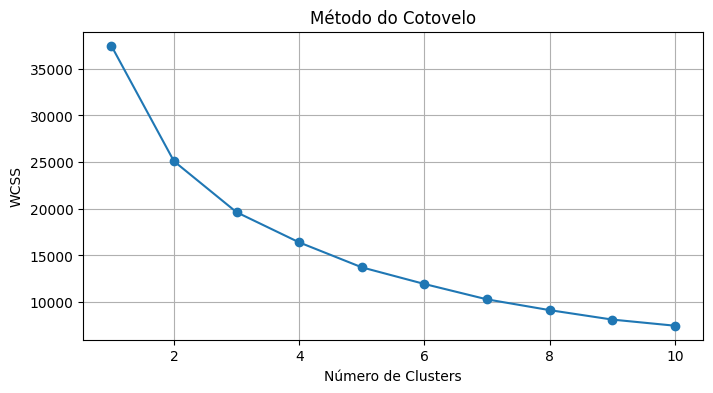

In [ ]:
#Método do cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
# Aplicar KMeans (ex: com 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
agrupado['Cluster'] = kmeans.fit_predict(X)


In [ ]:
# Análise dos cluster
print(agrupado.groupby('Cluster').mean())

         Cliente_Codigo   Total_Gasto   Total_Qtd  Total_Frete  Frequencia
Cluster                                                                   
0           4733.229008    460.004929    5.012585    52.644053    1.193758
1           3806.500000  34039.240300  223.800000  3199.995000    5.400000
2           3728.618721   4505.336555   53.009817   411.531758    4.159817
3           3814.769231  13341.310977  639.730769   512.646923    5.538462


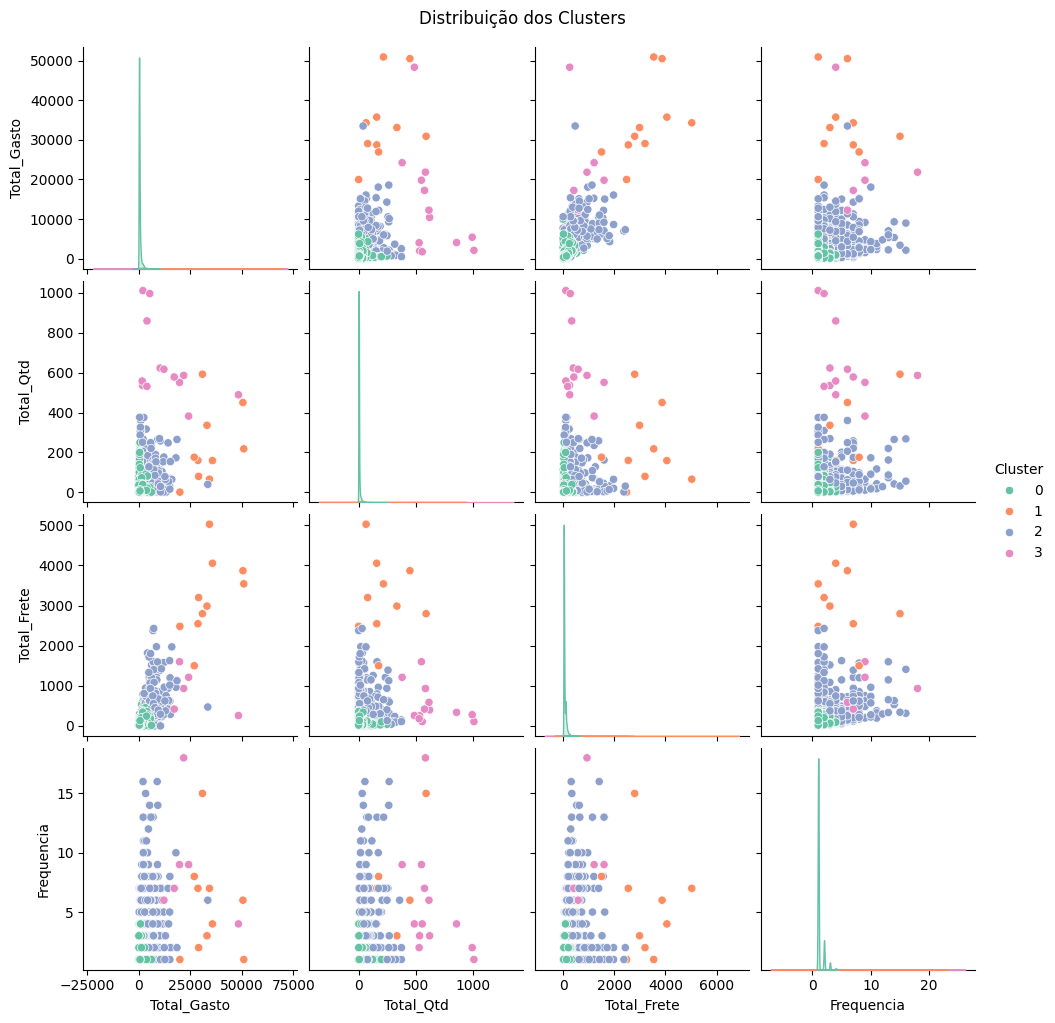

In [ ]:
# Visualização
sns.pairplot(agrupado.drop('Cliente_Codigo', axis=1), hue='Cluster', palette='Set2')
plt.suptitle('Distribuição dos Clusters', y=1.02)
plt.show()

In [ ]:
# Exportar resultado
df_final = agrupado.merge(df[['Cliente_Codigo', 'Cliente_ID']], on='Cliente_Codigo', how='left')
df_final = df_final.drop_duplicates(subset='Cliente_Codigo')
df_final.to_excel('clientes_com_clusters.xlsx', index=False)
files.download('clientes_com_clusters.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Gerar tabela visual dos clusters
tabela_clusters = df_final.groupby('Cluster').agg({
    'Cliente_Codigo': 'count',
    'Total_Gasto': 'mean',
    'Frequencia': 'mean'
}).reset_index()

tabela_clusters.columns = ['Cluster', 'Contagem de Cliente_Codigo', 'Média de Total_Gasto', 'Média de Frequencia']
tabela_clusters['Média de Total_Gasto'] = tabela_clusters['Média de Total_Gasto'].round(2)
tabela_clusters['Média de Frequencia'] = tabela_clusters['Média de Frequencia'].round(0)

# Exibir tabela com estilo no Colab
tabela_clusters.style\
    .background_gradient(cmap='Blues')\
    .format({'Média de Total_Gasto': 'R$ {:.2f}', 'Média de Frequencia': '{:.0f}'})\
    .set_caption("Resumo dos Clusters - Análise de Clientes")

,Cluster,Contagem de Cliente_Codigo,Média de Total_Gasto,Média de Frequencia
0,0,8908,R$ 460.00,1
1,1,10,R$ 34039.24,5
2,2,438,R$ 4505.34,4
3,3,13,R$ 13341.31,6
